In [2]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 7us/step


In [11]:
import numpy as np

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train[3]

array([3.9610e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01,
       6.0370e+00, 3.4500e+01, 5.9853e+00, 5.0000e+00, 2.2400e+02,
       2.0200e+01, 3.9690e+02, 8.0100e+00])

In [24]:
np.mean(x_test[:11])

65.44825195804195

In [30]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
np.mean(x_train[:11])

x_test -= mean
x_test /= std

x_val = x_train[:100]
partial_x_train = x_train[100:]

y_val = y_train[:100]
partial_y_train = y_train[100:]

In [48]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(x_test.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [59]:
num_epochs = 5
model = build_model()
history = model.fit(partial_x_train, partial_y_train, epochs=num_epochs, batch_size=1, verbose=0)
mae = history.history['mean_absolute_error']


In [60]:
min(mae)

2.647656461125926

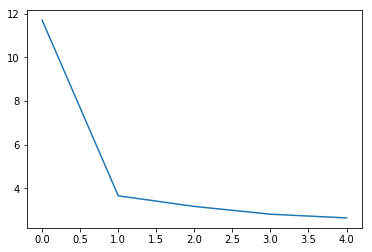

In [61]:
import matplotlib.pyplot as plt
plt.plot(mae)

In [62]:
results = model.evaluate(x_test, y_test)
results

102/102 [==============================] - 0s 1ms/step


[2258.111890605852, 45.18465984568876]